## Problem2

A logistics company recorded the time taken for delivery and the time taken for the sorting of the items for delivery. Build a Simple Linear Regression model to find the relationship between delivery time and sorting time with delivery time as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

In [59]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

dt = pd.read_csv("delivery_time.csv")

# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

dt.describe()



,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [60]:
dt.shape

(21, 2)

In [61]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

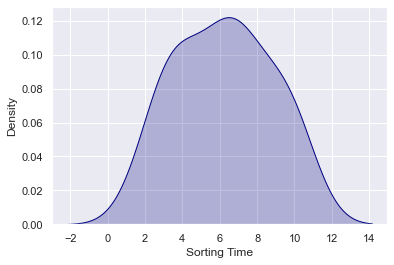

In [62]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes
import seaborn as sns
sns.set()

#plt.bar(height = dt['Sorting Time'], x = np.arange(100, 1100, 100))

sns.kdeplot(data=dt,x= dt['Sorting Time'],fill=True,color="navy")

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

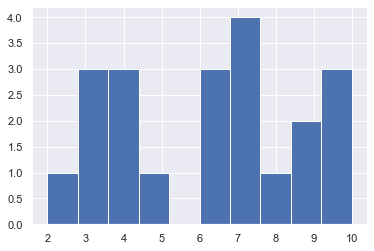

In [63]:
plt.hist(dt['Sorting Time']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x2b89d71c670>,
 'caps': [<matplotlib.lines.Line2D at 0x2b89d71cd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b89d71c2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b89d7284f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b89d728880>],
 'means': []}

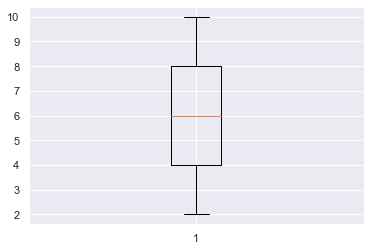

In [64]:
plt.boxplot(dt['Sorting Time']) #boxplot

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

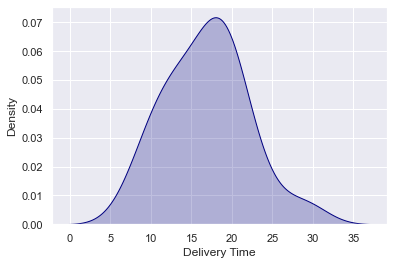

In [65]:
sns.kdeplot(data=dt,x= dt['Delivery Time'],fill=True,color="navy")

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

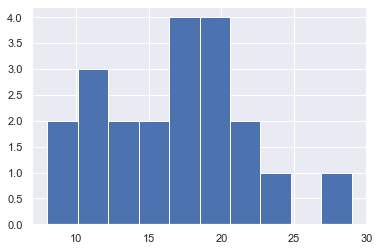

In [66]:
plt.hist(dt['Delivery Time']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x2b89d868250>,
 'caps': [<matplotlib.lines.Line2D at 0x2b89d868970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b89d85ae80>],
 'medians': [<matplotlib.lines.Line2D at 0x2b89d872100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b89d872490>],
 'means': []}

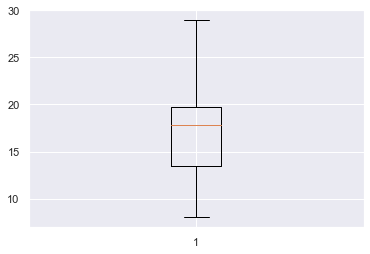

In [67]:
plt.boxplot(dt['Delivery Time']) #boxplot

### Bivariate

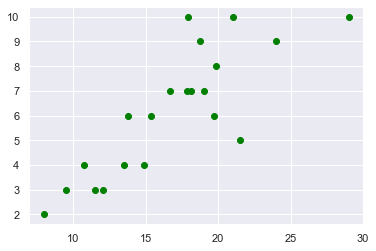

In [68]:
# Scatter plot
plt.scatter(x = dt['Delivery Time'], y = dt['Sorting Time'], color = 'green')


In [69]:
dt.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [70]:
# correlation
np.corrcoef(dt['Sorting Time'], dt['Delivery Time']) 

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [71]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(dt['Sorting Time'], dt['Delivery Time'])[0, 1]
cov_output



10.655809523809523

In [72]:
dt.rename(columns={'Sorting Time': 'SortingTime', 'Delivery Time': 'DeliveryTime'}, inplace=True)

In [73]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#dt=scaler.fit_transform(dt)

In [74]:
dt

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [75]:
dt = pd.DataFrame(dt)
dt.columns= ['DeliveryTime','SortingTime']

In [76]:
dt

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [83]:
# dt.cov()


# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('SortingTime ~ DeliveryTime', data = dt).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        11:49:54   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

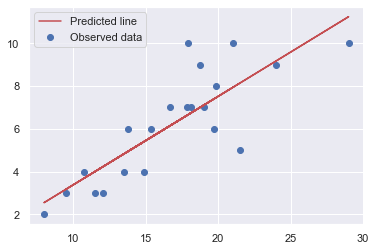

In [84]:
pred1 = model.predict(pd.DataFrame(dt['DeliveryTime']))

# Regression Line
plt.scatter(dt.DeliveryTime, dt.SortingTime)
plt.plot(dt.DeliveryTime, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [85]:
# Error calculation
res1 = dt.SortingTime - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

1.398343056795723

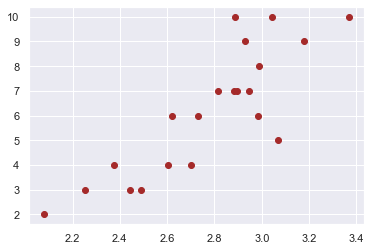

In [80]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(dt['DeliveryTime']), y = dt['SortingTime'], color = 'brown')

In [81]:
np.corrcoef(np.log(dt.DeliveryTime), dt.SortingTime) #correlation

array([[1.        , 0.84317726],
       [0.84317726, 1.        ]])

In [86]:
model2 = smf.ols('SortingTime ~ np.log(DeliveryTime)', data = dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.59e-06
Time:                        11:50:05   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DeliveryTime)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

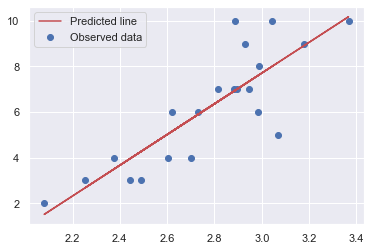

In [87]:
pred2 = model2.predict(pd.DataFrame(dt['DeliveryTime']))

# Regression Line
plt.scatter(np.log(dt.DeliveryTime), dt.SortingTime)
plt.plot(np.log(dt.DeliveryTime), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [89]:
# Error calculation
res2 = dt.SortingTime - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

1.3337477286899515

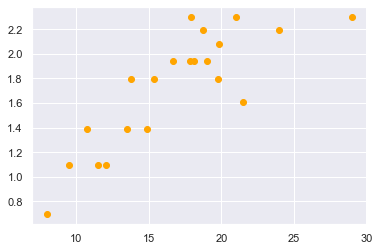

In [90]:
#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = dt['DeliveryTime'], y = np.log(dt['SortingTime']), color = 'orange')

In [91]:
np.corrcoef(dt.DeliveryTime, np.log(dt.SortingTime)) #correlation

array([[1.        , 0.83393253],
       [0.83393253, 1.        ]])

In [92]:
model3 = smf.ols('np.log(SortingTime) ~ DeliveryTime', data = dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Tue, 19 Apr 2022   Prob (F-statistic):           2.64e-06
Time:                         11:50:46   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
pred3 = model3.predict(pd.DataFrame(dt['DeliveryTime']))
pred3_at = np.exp(pred3)
pred3_at

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

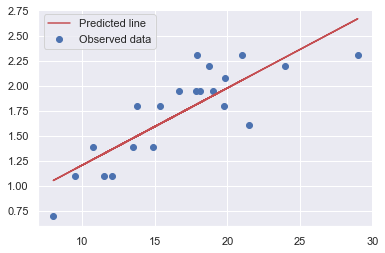

In [94]:
# Regression Line
plt.scatter(dt.DeliveryTime, np.log(dt.SortingTime))
plt.plot(dt.DeliveryTime, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [95]:
# Error calculation
res3 = dt.SortingTime - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

1.7921450016869793

In [96]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(SortingTime) ~ DeliveryTime + I(DeliveryTime*DeliveryTime)', data = dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.794
Model:                             OLS   Adj. R-squared:                  0.771
Method:                  Least Squares   F-statistic:                     34.62
Date:                 Tue, 19 Apr 2022   Prob (F-statistic):           6.77e-07
Time:                         11:50:59   Log-Likelihood:                 3.2337
No. Observations:                   21   AIC:                           -0.4673
Df Residuals:                       18   BIC:                             2.666
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.7780      0.450     -1.730      0.101      -1.723       0.167
DeliveryTime                       0.2272      0.052      4.346      0.000       0.117       0.337
I(DeliveryTime * DeliveryTime)    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
pred4 = model4.predict(pd.DataFrame(dt))
pred4_at = np.exp(pred4)
pred4_at

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [98]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = dt.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = dt.iloc[:, 1].values

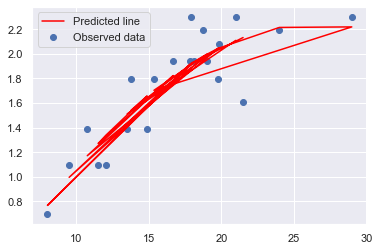

In [99]:
plt.scatter(dt.DeliveryTime, np.log(dt.SortingTime))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [100]:
# Error calculation
res4 = dt.SortingTime - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

1.347141980025573

In [101]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,1.398343
1,Log model,1.333748
2,Exp model,1.792145
3,Poly model,1.347142


In [102]:
###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(dt, test_size = 0.2)

finalmodel = smf.ols('SortingTime ~ np.log(DeliveryTime)', data = dt).fit()
finalmodel.summary()
# Simple Linear Regression



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.59e-06
Time:                        11:52:05   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DeliveryTime)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

1     5.031310
16    5.154901
10    7.621170
6     7.333179
13    3.951314
dtype: float64

In [104]:
# Model Evaluation on Test data
test_res = test.SortingTime - test_pred
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

0.766460700606153

In [105]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
train_pred

15     5.686869
2      7.593942
3      8.906703
0      8.007296
19     6.905090
4     10.181351
11     3.497060
14     4.254794
12     6.456018
18     1.506947
5      5.896328
20     8.165786
9      7.243965
17     7.010043
7      2.664452
8      6.931482
dtype: float64

In [106]:
# Model Evaluation on train data
train_res = train.SortingTime -train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse



1.466697673594266